**Task 3(a): Take grayscale image of size 512x512, add some salt & pepper noise, apply harmonic & geometric mean filter on the noisy image & compare their performance with PSNR**

### Importing the Libraries

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Harmonic Mean Filter
- **The Harmonic Mean Filter works well for salt noise, but fails for pepper noise. It does well also with other types of noise like Gaussian noise.**

In [55]:
def harmonic_mean_filter(image, mask_size):
    filtered_image = []
    height, width = image.shape
    offset, num_of_pixel = mask_size // 2, mask_size * mask_size

    for r in range(height):
        temp_row = []
        for c in range(width):
            pixel = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        pixel += float(1 / (image[r + x, c + y] + 1e-4))
            pixel = num_of_pixel / pixel
            pixel = 255 if pixel > 255 else pixel
            temp_row.append(pixel)
        filtered_image.append(temp_row)

    return np.uint8(filtered_image)    

### Function for Geometric Mean Filter

In [56]:
# def geometric_mean_filter(image, mask_size):
#     filtered_image = []
#     height, width = image.shape
#     offset, power = mask_size // 2, mask_size * mask_size

#     for r in range(height):
#         temp_row = []
#         for c in range(width):
#             pixel = 1
#             for x in range(-offset, offset + 1):
#                 for y in range(-offset, offset + 1):
#                     if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
#                         pixel = pixel * int((image[r + x, c + y] + 1e-4) ** power)
#             pixel = 255 if pixel > 255 else pixel
#             temp_row.append(pixel)
#         filtered_image.append(temp_row)

#     return np.uint8(filtered_image)    
def geometric_mean_filter(image, mask):
    height, width = image.shape
    average_image = []
    x = mask // 2
    for c in range(height):
        new_row = []
        for r in range(width):
            pixel, count = 1, 0
            for i in range(-x, x + 1, 1):
                for j in range(-x, x + 1, 1):
                    if (c + i >= 0 and c + i < height and r + j >= 0 and r + j < width):
                        if (image[c + i, r + j] != 0):
                            count += 1
                            pixel = pixel * int(image[c + i, r + j])
            count = 1 if count == 0 else count
            new_row.append(pixel**(1/count))
        average_image.append(new_row)
    return np.uint8(average_image)

### Function for adding Salt & Pepper Noise

In [57]:
def add_salt_pepper_noise(image):
    noise_amount = 5000
    noisy_image = image.copy()

    for k in range(noise_amount):
        index = []
        for x in range(1, 5):
            index.append(np.random.randint(0, image.shape[0]))
        noisy_image[index[0], index[1]], noisy_image[index[2], index[3]] = 0, 255

    return noisy_image

### Function for calculating PSNR (Peak Signal to Noise Ratio)
- **Function: psnr = cv2.PSNR(image1, image2)**

In [58]:
def image_psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2) 
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)
    return round(psnr, 2)

### Loading the Image

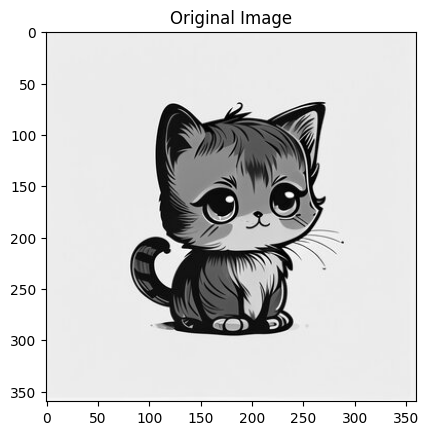

In [59]:
cat_image = cv2.imread("./Cat 360x360.jpg", 0)
plt.imshow(cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

### Adding Salt & Pepper Noise to the Image

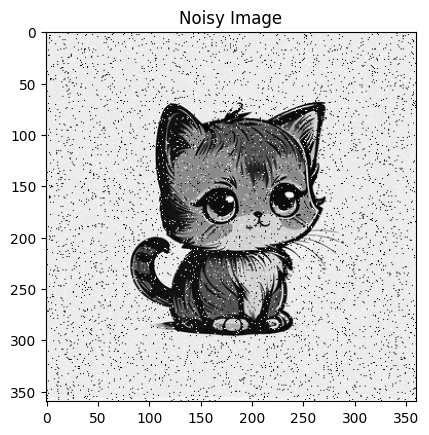

PSNR = 15.2


15.202196158340175

In [60]:
noisy_cat_image = add_salt_pepper_noise(cat_image)
plt.imshow(cv2.cvtColor(noisy_cat_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.show()
psnr = image_psnr(cat_image, noisy_cat_image)
print(f"PSNR = {psnr}")
cv2.PSNR(cat_image, noisy_cat_image)

### Applying Harmonic Mean Spatial Filter

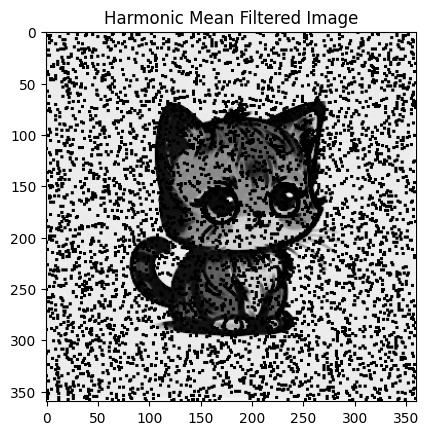

PSNR = 6.89


In [61]:
harmonic_cat_image = harmonic_mean_filter(noisy_cat_image, 3)
plt.imshow(cv2.cvtColor(harmonic_cat_image, cv2.COLOR_BGR2RGB))
plt.title("Harmonic Mean Filtered Image")
plt.show()
psnr = image_psnr(cat_image, harmonic_cat_image)
print(f"PSNR = {psnr}")

### Applying Geometric Mean Spatial Filter

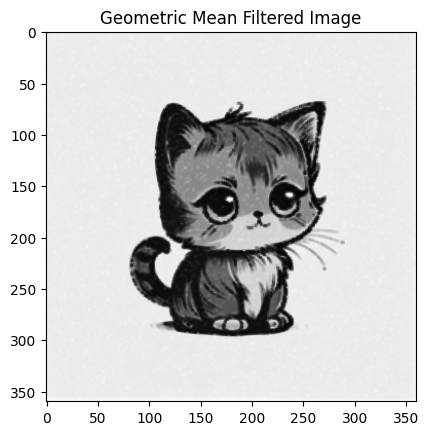

PSNR = 23.7


In [62]:
geo_cat_image = geometric_mean_filter(noisy_cat_image, 3)
plt.imshow(cv2.cvtColor(geo_cat_image, cv2.COLOR_BGR2RGB))
plt.title("Geometric Mean Filtered Image")
plt.show()
psnr = image_psnr(cat_image, geo_cat_image)
print(f"PSNR = {psnr}")